In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten , Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
  import os 
os.environ['KAGGLE_USERNAME']='parthkhanna12'
os.environ['KAGGLE_KEY']='787d2208b0ddf375268e08aa45324b39'

In [ ]:
! kaggle datasets download -d prithwirajmitra/covid-face-mask-detection-dataset

covid-face-mask-detection-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip covid-face-mask-detection-dataset.zip

Archive:  covid-face-mask-detection-dataset.zip
replace New Masks Dataset/Test/Mask/2070.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: New Masks Dataset


In [ ]:
main_dir='/content/New Masks Dataset'
train_dir=os.path.join(main_dir,'Train')
test_dir=os.path.join(main_dir,'Test')
valid_dir=os.path.join(main_dir,'Validation')

train_mask_dir=os.path.join(test_dir,'Mask')
train_nomask_dir=os.path.join(test_dir,'Non Mask')



In [ ]:

train_mask_names= os.listdir(train_mask_dir)
print(train_mask_names[:10])

train_nomask_names= os.listdir(train_nomask_dir)
print(train_nomask_names[:10])

['2205.png', '2254.png', '2070.jpg', '2154.png', '2257.png', '2130.jpg', '2174.png', '2245.png', '2191.png', '2251.png']
['real_01069.jpg', 'real_01080.jpg', 'real_01052.jpg', 'real_01045.jpg', 'real_01071.jpg', 'real_01065.jpg', 'real_01060.jpg', 'real_01056.jpg', 'real_01072.jpg', 'real_01057.jpg']


['/content/New Masks Dataset/Test/Mask/2205.png', '/content/New Masks Dataset/Test/Mask/2254.png', '/content/New Masks Dataset/Test/Mask/2070.jpg', '/content/New Masks Dataset/Test/Mask/2154.png', '/content/New Masks Dataset/Test/Mask/2257.png', '/content/New Masks Dataset/Test/Mask/2130.jpg', '/content/New Masks Dataset/Test/Mask/2174.png', '/content/New Masks Dataset/Test/Mask/2245.png']
['/content/New Masks Dataset/Test/Non Mask/real_01069.jpg', '/content/New Masks Dataset/Test/Non Mask/real_01080.jpg', '/content/New Masks Dataset/Test/Non Mask/real_01052.jpg', '/content/New Masks Dataset/Test/Non Mask/real_01045.jpg', '/content/New Masks Dataset/Test/Non Mask/real_01071.jpg', '/content/New Masks Dataset/Test/Non Mask/real_01065.jpg', '/content/New Masks Dataset/Test/Non Mask/real_01060.jpg', '/content/New Masks Dataset/Test/Non Mask/real_01056.jpg']


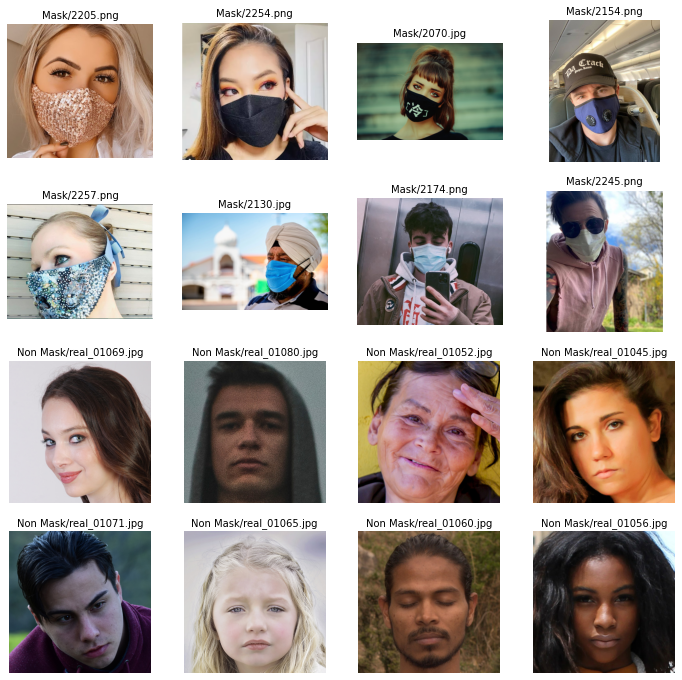

In [ ]:
import matplotlib.image as mpimg
nrows = 4
ncols = 4
plt.figure(figsize=(12,12))

mask_pic=[]
for i in train_mask_names[0:8]:
  mask_pic.append(os.path.join(train_mask_dir,i))

nomask_pic=[]
for i in train_nomask_names[0:8]:
  nomask_pic.append(os.path.join(train_nomask_dir,i))

print(mask_pic)
print(nomask_pic)

merged_list = mask_pic+nomask_pic
for i in range(0,len(merged_list)):
  data = merged_list[i].split('/',4)[4]
  sp=plt.subplot(nrows,ncols,i+1)
  sp.axis('off')
  image = mpimg.imread(merged_list[i])
  sp.set_title(data,fontsize=10)
  plt.imshow(image,cmap='gray')

plt.show()
  

In [ ]:
  train_datagen = ImageDataGenerator(rescale=1./255,
                                     zoom_range=0.2,
                                     rotation_range = 40,
                                     horizontal_flip = True
                                     )
  test_datagen = ImageDataGenerator(rescale=1./255)
  validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary'
                                                    )

test_generator = test_datagen.flow_from_directory(test_dir,
                                                    target_size=(150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary'
                                                    )

valid_generator = validation_datagen.flow_from_directory(valid_dir,
                                                    target_size=(150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary'
                                                    )

Found 600 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


In [ ]:
train_generator.image_shape

(150, 150, 3)

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),padding='SAME',activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64,(3,3),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 37, 37, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 87616)            

In [ ]:
model.compile(Adam(learning_rate=0.001),loss='binary_crossentropy',metrics='accuracy')

In [ ]:
history = model.fit(train_generator,
                    epochs = 30,
                    validation_data = valid_generator)

Epoch 1/30
19/19 [==============================] - 12s 633ms/step - loss: 2.3238 - accuracy: 0.5750 - val_loss: 0.6867 - val_accuracy: 0.5850
Epoch 2/30
19/19 [==============================] - 12s 617ms/step - loss: 0.5467 - accuracy: 0.7667 - val_loss: 0.5767 - val_accuracy: 0.7908
Epoch 3/30
19/19 [==============================] - 12s 620ms/step - loss: 0.4086 - accuracy: 0.8333 - val_loss: 0.4669 - val_accuracy: 0.8562
Epoch 4/30
19/19 [==============================] - 12s 625ms/step - loss: 0.3464 - accuracy: 0.8733 - val_loss: 0.4864 - val_accuracy: 0.8399
Epoch 5/30
19/19 [==============================] - 12s 621ms/step - loss: 0.2942 - accuracy: 0.9067 - val_loss: 0.2932 - val_accuracy: 0.9314
Epoch 6/30
19/19 [==============================] - 12s 629ms/step - loss: 0.2495 - accuracy: 0.9133 - val_loss: 0.2811 - val_accuracy: 0.9150
Epoch 7/30
19/19 [==============================] - 12s 626ms/step - loss: 0.2426 - accuracy: 0.9167 - val_loss: 0.3165 - val_accuracy: 0.8922

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

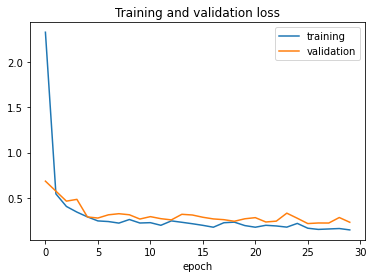

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training and validation loss')
plt.xlabel('epoch')


Text(0.5, 0, 'epoch')

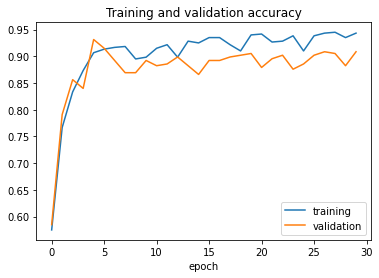

In [ ]:
 plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')

In [ ]:
 test_loss , test_acc = model.evaluate(test_generator)
 print('test loss:{} test acc:{}'.format(test_loss,test_acc))

4/4 [==============================] - 1s 189ms/step - loss: 0.1750 - accuracy: 0.9500
test loss:0.17495620250701904 test acc:0.949999988079071


In [ ]:
from google.colab import files
from keras.preprocessing import image 
uploaded = files.upload()
for fname in uploaded.keys():
  img_path = '/content/'+ fname
  img = image.load_img(img_path,target_size=(150,150))
  images = image.img_to_array(img)
  images = np.expand_dims(images,axis=0)
  prediction = model.predict(images)
  print(fname)
  if prediction == 0:
    print('Mask')
  else:
    print('No Mask')
     
  


In [ ]:
model.save('model.h5')